In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../RadNet_Laboratory_Analysis.csv')

df.dtypes

State             object
Location          object
Date Posted       object
Date Collected    object
Sample Type       object
Unit              object
Ba-140            object
Co-60             object
Cs-134            object
Cs-136            object
Cs-137            object
I-131             object
I-132             object
I-133             object
Te-129            object
Te-129m           object
Te-132            object
dtype: object

In [4]:
columns = df.columns
id_cols = ['State','Location',"Date Posted",'Date Collected', 'Sample Type','Unit']
columns = list(set(columns)-set(id_cols))
columns

['Cs-137',
 'Co-60',
 'I-132',
 'Cs-134',
 'Cs-136',
 'Te-132',
 'I-133',
 'I-131',
 'Te-129',
 'Te-129m',
 'Ba-140']

In [5]:
df.loc[:,columns]=df.loc[:,columns].applymap(lambda x: np.nan if ((x == "Non-detect")|(x=="ND")) else x)
df.loc[:,columns].head()

,Cs-137,Co-60,I-132,Cs-134,Cs-136,Te-132,I-133,I-131,Te-129,Te-129m,Ba-140
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.055,NaN,NaN,NaN
2,0.0074,NaN,NaN,0.0057,NaN,0.0043,NaN,0.067,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22,NaN,NaN,NaN


In [6]:
df['Date Posted'] = pd.to_datetime(df['Date Posted'])
df['Date Collected'] = pd.to_datetime(df['Date Collected'])
for col in columns:
    df[col] = pd.to_numeric(df[col])

df.dtypes

State                     object
Location                  object
Date Posted       datetime64[ns]
Date Collected    datetime64[ns]
Sample Type               object
Unit                      object
Ba-140                   float64
Co-60                    float64
Cs-134                   float64
Cs-136                   float64
Cs-137                   float64
I-131                    float64
I-132                    float64
I-133                    float64
Te-129                   float64
Te-129m                  float64
Te-132                   float64
dtype: object

In [7]:
id_cols = pd.Series(id_cols)
for col in id_cols:
    df[col] = df[col].astype('category')

df.dtypes

State             category
Location          category
Date Posted       category
Date Collected    category
Sample Type       category
Unit              category
Ba-140             float64
Co-60              float64
Cs-134             float64
Cs-136             float64
Cs-137             float64
I-131              float64
I-132              float64
I-133              float64
Te-129             float64
Te-129m            float64
Te-132             float64
dtype: object

In [9]:
df.groupby('State')

Select the radionuclide CS-134 and calcuate the average value per group:

In [11]:
df.groupby('State')['Cs-134'].head()

0         NaN
1         NaN
2      0.0057
3         NaN
4         NaN
        ...  
551    1.4000
552       NaN
555       NaN
574       NaN
575       NaN
Name: Cs-134, Length: 206, dtype: float64

In [13]:
df.groupby(['State','Location']).mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f25f7f9c7f0>>

In [ ]:
df.groupby(['State', 'Location']).agg({'Cs-134':['mean',
'std'],'Te-129':['min', 'max']})

<h3>Exercise 7. Exporting Data in Diffrent Formats

In [14]:
df.to_csv('radiation_clean.csv',
          index=False,
          sep=';',
          encoding='utf-8'
)

<h4>#3. Create a plot with a filter per Location, selecting the city of San Bernardino, and one radionculide,
with the x-axis set tot the date and the y-axis with radionuclide I-131:

<AxesSubplot:xlabel='Date Collected'>

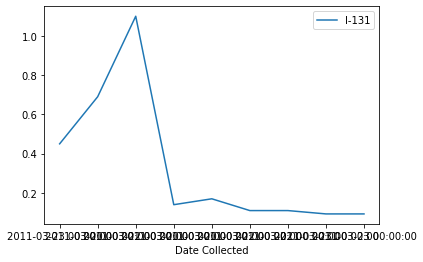

In [16]:
df.loc[df.Location == 'San Bernardino'].plot(x='Date Collected', y='I-131')

<h4>#4.Create a plot using matplotlib.pl - matlab style - with the concencration of two related radionuclides, I-131 and
I-132